In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
import math

In [2]:
#define parameters 

#define grid area 
m , n = 60,50

#define count of antennas
s = 19

#define types of antenas 
t = 7
#antensa List , and set cost and radius
Antennas = []
a =rand.sample(range(4,15) , t)

for i in range(t):
    radius = a[i]
    cost = 1.2*(radius)+(rand.randint(1,5))
    anten = {'type':i ,'cost':cost , 'radius':radius}
    Antennas.append(anten)
    


In [3]:
Antennas

[{'type': 0, 'cost': 15.799999999999999, 'radius': 9},
 {'type': 1, 'cost': 12.6, 'radius': 8},
 {'type': 2, 'cost': 8.8, 'radius': 4},
 {'type': 3, 'cost': 17.8, 'radius': 14},
 {'type': 4, 'cost': 16.6, 'radius': 13},
 {'type': 5, 'cost': 16.0, 'radius': 10},
 {'type': 6, 'cost': 11.2, 'radius': 6}]

In [4]:
#initial first population 
def InitialPopulation(popsize , antenalist ,m,n,s):
    pop = []

    chosentypes = []
    for i in range (s):
        a = rand.randint(-1,len(antenalist))
        chosentypes.append(a)
    for i in range(popsize):
        ad = []
        
        for j in range(s):
            a= [chosentypes[j] , rand.randint(0,m),rand.randint(0,n)]
            
            ad.append(a)
        ad.append(0)    
        pop.append(ad)
        
        
    return pop
            
        

In [5]:
#sorting population based on the fittness , fitness is the the last member of choromosoms
def FitSort(population , s):
    sorted_list = sorted(
    population,
    key=lambda t: t[s],
    reverse=True)
    return sorted_list
                
    

In [6]:
#calculate fitness 
def ClacFitness(population ,s,antentypes,m,n):
    #cal costs
    
    for i in range(len(population)):
        sigma = 0
        coverd =[]
        coverdAll=[]
        for j in range(s):
            typ = pop[i][j][0]
            
            if(typ==-1):
                sigma = sigma+0
            else:
                sigma = sigma + int( antentypes[typ-1]['cost'])
                #calc U(x)
                radius =  antentypes[typ-1]['radius']
                xA = pop[i][j][1]
                yA = pop[i][j][2]
                for l in range(m+1):
                    for k in range(n+1):
                        distance = math.sqrt((xA-l)**2 + (yA-k)**2 )
                        if(distance<= radius):
                            a = [l,k]
                            coverd.append(a)
        #print(coverdAll)
        for w in range(len(coverd)):
            if(coverd[w] in coverdAll):
                continue
            else:
                coverdAll.append(coverd[w])
        #print(coverdAll)
        #print('**************')
        #print(len(coverdAll))
        population[i][s] = len(coverdAll) - sigma
    return population
        
            
            
                
            
            
        
    
    

In [7]:
# parent selection method 
def ParentSelection(population , s):
    SelectedParents = []
    #making tournoment 
    for i in range(2):
        n = len(population)
        parent = rand.sample(range(0 , n),6)
        tornument=[]
        for i in range(len(parent)):
            tornument.append(population[parent[i]])

        #calculate Summation of selected for tournument
        sumFitness = 0
        for i in range(len(tornument)):
            sumFitness = sumFitness + tornument[i][s]
        #sumFitness = sum([tornument[i][s] for tornument[i] in tornument])
        #print(sumFitness)
        #calculate shared of roulet 
        rouletShare=[]
        for i in range(len(tornument)):
            a = tornument[i][s]/sumFitness
            rouletShare.append(a)
        #rouletShare = [tornument[i][s]/sumFitness for tornument[i] in tornument]
        #print(tornument)
        #print(rouletShare)
        #print(sum(rouletShare))
        index = np.random.choice(len(tornument) ,p=rouletShare)
        SelectedParents.append(tornument[index])
    return SelectedParents

In [8]:
#implementing cross over 
def XoverBox(parents , s ,antennas ,m,n):
    child1 = []
    child2 = []
    childs = []
    parent1 = parents[0]
    parent2 = parents[1]
    breakpoint = rand.randint(0,s)
    #parent1
    gene1=[]
    gene2=[]
    #parent2
    gene3=[]
    gene4=[]
    for i in range(0,breakpoint):
        gene1.append(parent1[i])
        gene3.append(parent2[i])

    for i in range(breakpoint,s+1):
        gene2.append(parent1[i])
        gene4.append(parent2[i])
    #print(breakpoint)    
    #print('parent 1 ',parent1)
    #print('parent 2 ',parent2)
    #print('gene 1 ',gene1)
    #print('gene 2 ',gene2)
    #print('gene 3 ',gene3)
    #print('gene 4 ',gene4)
    #adding gene1 and gene4 if they are valid
    t1 =[]
    t3 = []
    for i in range(len(gene1)):
        t1.append((gene1[i][1],gene1[i][2]))
        t3.append((gene3[i][1],gene3[i][2]))
    t2=[]
    t4=[]
    for i in range(len(gene2)-1):
        t2.append((gene2[i][1],gene2[i][2]))
        t4.append((gene4[i][1],gene4[i][2]))
    
    child1 = gene1 + gene4
    child2 = gene3 + gene2

    return child1, child2



In [9]:
#definig mutation function
def MutationBox(childs,s , antenna , m , n):
    
    for i in range(len(childs)):
        for j in range(s):
            l = len(childs[i][j])
            rate = rand.randint(1,100)
            
            if rate < 5 :
                num = rand.randint(0,l-1)
                if(num == 0):
                    changed = rand.randint(0,len(antenna)-1)
                    childs[i][j][0]=changed
                    
                if(num == 1):
                    changed = rand.randint(0,m)
                    childs[i][j][1]=changed
                
                if(num == 2):
                    changed = rand.randint(0,n)
                    childs[i][j][2]=changed
                
    return childs

In [10]:
# parent selection method 2
def ParentSelection2(population ,antentypes, s,m,n):
    SelectedParents = []
    #making tournoment or roulet wheel 
    for i in range(2):
        n = len(population)
        parent = rand.sample(range(0 , n),6)
        tornument=[]
        # calculate coverd area of each parent
        
        for i in range(len(parent)):
            tornument.append(population[parent[i]])
            
        #print(tornument) 

        #calculate the percantege of coverd areas

        #defining grids
        grids =[]
        been =int( m/6)
        a=0
        flag=True
        for i in range(m):
            c=[]
            if(flag==False):
                break
            for j in range(been):

                c.append(been*i+j)
                if(been*i+j>=m):
                    flag=False
                    break

            grids.append(c)

        for i in range(len(grids)):
            grids[i].insert(0,-2)
        #print(grids) 
        r1 = []
        #claulate number of trigerrd grids by each chromosom :) 
        cnt=0
        for i in range(len(tornument)):

            for j in range(s):
                #print(tornument[i])
                X = tornument[i][j][1]
                #print(x)

                for k in range(len(grids)):

                    if(grids[k][0]==-2):
                        if(X in grids[k]):
                            grids[k][0]=-1
            for l in range(len(grids)):
                if(grids[l][0]==-1):
                    cnt=cnt+1
            for l in range(len(grids)):
                if(grids[l][0]==-1):
                    grids[l][0]=-2

            r1.append(cnt) 
            cnt=0
        # print(len(grids))    
        # print(r1)

        sumRnakes = sum(r1)
        # print(sumRnakes)
        # rouletShare = [r1[i]/sumRnakes for r1[i] in r1]
        rouletShare=[]
        for i in range(len(r1)):
            a = r1[i]/sumRnakes
            rouletShare.append(a)
        # print(rouletShare)
        # print(sum(rouletShare))
        index = np.random.choice(len(r1) ,p=rouletShare)
        # print(index)
        SelectedParents.append(tornument[index])
    return(SelectedParents)            
            
            
            
            


In [11]:
#implementing 1% elitism
def elitism(childs,population,s):
    a = population[0]
    l = len(childs)
    childs[l-1] = a
    return childs
    

In [12]:
# implemet survival selection
def SurvivalSelection(childs , population,s):
    m =len(population)
    i = m
    while(i-1 >=m/2):
        del population[i-1]
        i -= 1
        
        
    #print(len(childs))
    for j in range(len(childs)):
        population.append(childs[j])
    
        
        
    return population
    

In [13]:
#plot result
def PlotResult(answer , antentypes,s,m,n):
    coverd =[]
    coverdAll=[]
    antensplace = []
    Xantenas=[]
    Yantennas = []
    xcover = []
    ycover= []
    xem = []
    yem=[]
    for j in range(s):
        typ = answer[j][0]

        if(typ==-1):
            xA = answer[j][1]
            yA = answer[j][2]
            antensplace.append([xA,yA])
            xem.append(xA)
            yem.append(yA)
        else:
            
            #calc 
            radius =  antentypes[typ-1]['radius']
            xA = answer[j][1]
            yA = answer[j][2]
            antensplace.append([xA,yA])
            Xantenas.append(xA)
            Yantennas.append(yA)
            
            for l in range(m+1):
                for k in range(n+1):
                    distance = math.sqrt((xA-l)**2 + (yA-k)**2 )
                    if(distance<= radius):
                        a = [l,k]
                        coverd.append(a)
    #print(coverdAll)
    for w in range(len(coverd)):
        if(coverd[w] in coverdAll):
            continue
        else:
            coverdAll.append(coverd[w])
    #print(coverdAll)
    #print('**************')
    #print(len(coverdAll))
    for i in range(len(coverdAll)):
        xcover.append(coverdAll[i][0])
        ycover.append(coverdAll[i][1])
    print(antensplace)
    data = []
    x = []
    y =[]
    for i in range(m+1):

        for j in range(n+1):
            data.append([i,j])
            x.append(i)
            y.append(j)
    data = np.array(data)
    plt.figure(figsize=(6,6))
    ax = plt.axes()
    ax.set_facecolor("black")
    plt.plot(x,y,'o',color='white',)
    plt.plot(xcover,ycover,'yo')
    plt.plot(Xantenas,Yantennas,'ro')
    plt.plot(xem,yem,'bo')
    plt.show()
    
    

In [14]:
#initialize the population
FirstSeed = InitialPopulation(100 , Antennas ,m,n,s)


In [15]:
#set One as asked in qusetion 


pop = FirstSeed
population = ClacFitness(pop ,s,Antennas,m,n)
population = FitSort(population,s)
count = 0
fitness1 = []
while count<100:
    
    childs=[]

    while(len(childs)<100):
        parents = ParentSelection(population,s)
        c1 , c2 =XoverBox(parents,s,Antennas,m,n)
        childs.append(c1)
        childs.append(c2)

    childs = MutationBox(childs,s,Antennas , m , n)
    childs = ClacFitness(childs ,s,Antennas,m,n)
    childs = FitSort(childs,s)
    new_generation = elitism(childs,population,s)
    new_generation = FitSort(new_generation,s)
    population = new_generation
    fitness1.append(population[0][s])
    count += 1
    if(count%3 == 0):
        print('itration : ',count)
    if count == 100:
        print('Done , final result is ;',population[0])

itration :  3
itration :  6
itration :  9
itration :  12
itration :  15
itration :  18
itration :  21
itration :  24
itration :  27
itration :  30
itration :  33
itration :  36
itration :  39
itration :  42
itration :  45
itration :  48
itration :  51
itration :  54
itration :  57
itration :  60
itration :  63
itration :  66
itration :  69
itration :  72
itration :  75
itration :  78
itration :  81
itration :  84
itration :  87
itration :  90
itration :  93
itration :  96
itration :  99
Done , final result is ; [[0, 18, 47], [1, 53, 47], [0, 47, 49], [5, 59, 38], [1, 11, 43], [3, 23, 23], [3, 31, 11], [5, 10, 23], [2, 14, 28], [6, 48, 49], [5, 47, 50], [1, 53, 3], [4, 37, 42], [3, 15, 37], [4, 17, 12], [3, 21, 4], [6, 25, 18], [6, 36, 46], [2, 20, 36], 2648]


[[18, 47], [53, 47], [47, 49], [59, 38], [11, 43], [23, 23], [31, 11], [10, 23], [14, 28], [48, 49], [47, 50], [53, 3], [37, 42], [15, 37], [17, 12], [21, 4], [25, 18], [36, 46], [20, 36]]


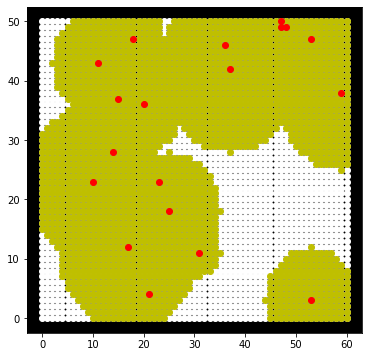

[[0, 18, 47],
 [1, 53, 47],
 [0, 47, 49],
 [5, 59, 38],
 [1, 11, 43],
 [3, 23, 23],
 [3, 31, 11],
 [5, 10, 23],
 [2, 14, 28],
 [6, 48, 49],
 [5, 47, 50],
 [1, 53, 3],
 [4, 37, 42],
 [3, 15, 37],
 [4, 17, 12],
 [3, 21, 4],
 [6, 25, 18],
 [6, 36, 46],
 [2, 20, 36],
 2648]

In [16]:
answer = population[0]
ns = population[0]
PlotResult(population[0] , Antennas ,s,m,n)
answer

In [17]:
 answer

[[0, 18, 47],
 [1, 53, 47],
 [0, 47, 49],
 [5, 59, 38],
 [1, 11, 43],
 [3, 23, 23],
 [3, 31, 11],
 [5, 10, 23],
 [2, 14, 28],
 [6, 48, 49],
 [5, 47, 50],
 [1, 53, 3],
 [4, 37, 42],
 [3, 15, 37],
 [4, 17, 12],
 [3, 21, 4],
 [6, 25, 18],
 [6, 36, 46],
 [2, 20, 36],
 2648]

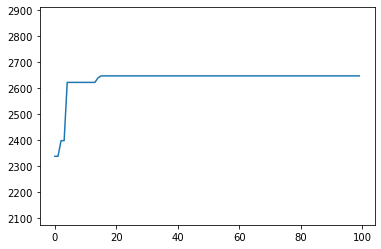

In [18]:
data=[]
fitness1= np.array(fitness1)
for i in range(100):
    data.append(i)
plt.figure()    
plt.plot(data,fitness1)
plt.ylim(fitness1.min()-fitness1.mean()/10,fitness1.max()+fitness1.mean()/10)
plt.show()

In [20]:
#set Two with changed parent selection
pop = FirstSeed
population2 = ClacFitness(pop ,s,Antennas,m,n)
population2 = FitSort(population2,s)
count = 0
fitness2 = []
while count<100:
    
    childs=[]

    while(len(childs)<100):
        parents = ParentSelection2(population2,Antennas,s,m,n)
        c1 , c2 =XoverBox(parents,s,Antennas,m,n)
        childs.append(c1)
        childs.append(c2)

    #childs = ClacFitness(childs ,s,Antennas,m,n)
    #childs = FitSort(childs,s)
    childs = MutationBox(childs,s,Antennas , m , n)
    childs = ClacFitness(childs ,s,Antennas,m,n)
    childs = FitSort(childs,s)
    new_generation = elitism(childs,population2,s)
    new_generation = FitSort(new_generation,s)
    population2 = new_generation
    fitness2.append(population2[0][s])
    count += 1
    if(count%10 == 0):
        print('itration : ',count)
    if count == 100:
        print('Done , final result is ;',population2[0])


itration :  10
itration :  20
itration :  30
itration :  40
itration :  50
itration :  60
itration :  70
itration :  80
itration :  90
itration :  100
Done , final result is ; [[5, 46, 13], [4, 46, 13], [6, 35, 18], [2, 33, 25], [2, 40, 14], [1, 10, 5], [1, 2, 16], [4, 26, 40], [6, 43, 6], [5, 21, 26], [4, 34, 31], [2, 0, 32], [6, 47, 48], [6, 26, 29], [1, 13, 37], [3, 27, 23], [3, 20, 26], [1, 12, 49], [0, 32, 11], 2654]


[[46, 13], [46, 13], [35, 18], [33, 25], [40, 14], [10, 5], [2, 16], [26, 40], [43, 6], [21, 26], [34, 31], [0, 32], [47, 48], [26, 29], [13, 37], [27, 23], [20, 26], [12, 49], [32, 11]]


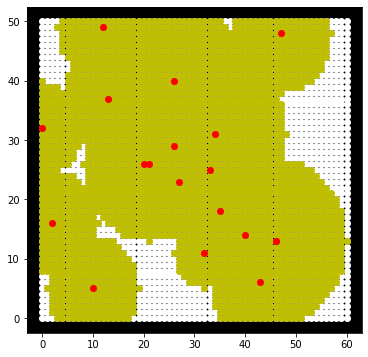

[[5, 46, 13],
 [4, 46, 13],
 [6, 35, 18],
 [2, 33, 25],
 [2, 40, 14],
 [1, 10, 5],
 [1, 2, 16],
 [4, 26, 40],
 [6, 43, 6],
 [5, 21, 26],
 [4, 34, 31],
 [2, 0, 32],
 [6, 47, 48],
 [6, 26, 29],
 [1, 13, 37],
 [3, 27, 23],
 [3, 20, 26],
 [1, 12, 49],
 [0, 32, 11],
 2654]

In [21]:
answer = population2[0]
ns = population2[10]
PlotResult(population2[0] , Antennas ,s,m,n)
answer

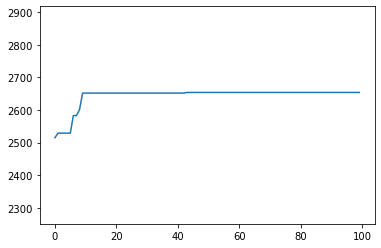

In [23]:
data=[]
fitness2= np.array(fitness2)
for i in range(100):
    data.append(i)
plt.figure()    
plt.plot(data,fitness2)
plt.ylim(fitness2.min()-fitness2.mean()/10,fitness2.max()+fitness2.mean()/10)
plt.show()

In [24]:
#set Three with changed survival Selection
pop = FirstSeed
population3 = ClacFitness(pop ,s,Antennas,m,n)
population3 = FitSort(population3,s)
count = 0
fitness3 = []
while count<100:
    
    childs=[]

    while(len(childs)<50):
        parents = ParentSelection(population3,s)
        c1 , c2 =XoverBox(parents,s,Antennas,m,n)
        childs.append(c1)
        childs.append(c2)


    #childs = ClacFitness(childs ,s,Antennas,m,n)
    #childs = FitSort(childs,s)
    childs = MutationBox(childs,s,Antennas , m , n)
    childs = ClacFitness(childs ,s,Antennas,m,n)
    childs = FitSort(childs,s)
    new_generation = SurvivalSelection(childs,population3,s)
    new_generation = FitSort(new_generation,s)
    population3 = new_generation
    fitness3.append(population3[0][s])
    count += 1
    if(count%10 == 0):
        print('itration : ',count)
    if count == 100:
        print('Done , final result is ;',population3[0])


itration :  10
itration :  20
itration :  30
itration :  40
itration :  50
itration :  60
itration :  70
itration :  80
itration :  90
itration :  100
Done , final result is ; [[0, 50, 42], [2, 35, 14], [3, 9, 45], [2, 27, 13], [3, 8, 35], [0, 4, 29], [2, 0, 7], [6, 14, 25], [6, 55, 48], [0, 23, 35], [2, 45, 16], [2, 39, 27], [4, 7, 33], [5, 56, 28], [6, 41, 5], [3, 45, 26], [0, 11, 7], [5, 6, 0], [6, 47, 36], 2628]


[[50, 42], [35, 14], [9, 45], [27, 13], [8, 35], [4, 29], [0, 7], [14, 25], [55, 48], [23, 35], [45, 16], [39, 27], [7, 33], [56, 28], [41, 5], [45, 26], [11, 7], [6, 0], [47, 36]]


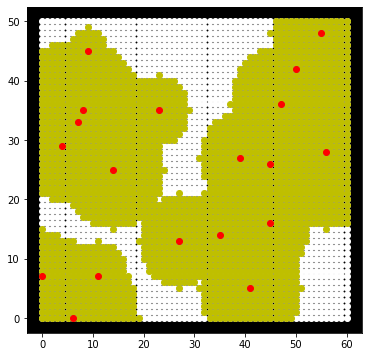

[[0, 50, 42],
 [2, 35, 14],
 [3, 9, 45],
 [2, 27, 13],
 [3, 8, 35],
 [0, 4, 29],
 [2, 0, 7],
 [6, 14, 25],
 [6, 55, 48],
 [0, 23, 35],
 [2, 45, 16],
 [2, 39, 27],
 [4, 7, 33],
 [5, 56, 28],
 [6, 41, 5],
 [3, 45, 26],
 [0, 11, 7],
 [5, 6, 0],
 [6, 47, 36],
 2628]

In [25]:
answer = population3[0]
ns = population3[10]
PlotResult(answer , Antennas ,s,m,n)
answer

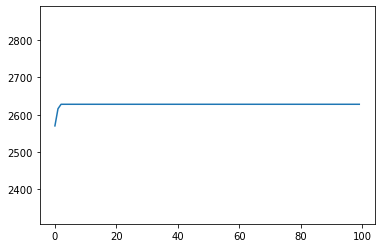

In [26]:
data=[]
fitness3= np.array(fitness3)
for i in range(100):
    data.append(i)
plt.figure()    
plt.plot(data,fitness3)
plt.ylim(fitness3.min()-fitness3.mean()/10,fitness3.max()+fitness3.mean()/10)
plt.show()

In [27]:
#set Four with survival selection and new parent selection 
pop = FirstSeed
population4 = ClacFitness(pop ,s,Antennas,m,n)
population4 = FitSort(population4,s)
count = 0
fitness4 = []
while(count<100):
    children=[]
    while(len(children)<50):
        parentss = ParentSelection2(population4,Antennas,s,m,n)
        c1 , c2 =XoverBox(parentss,s,Antennas,m,n)
        children.append(c1)
        children.append(c2)

    children = MutationBox(children,s,Antennas,m,n)
    children=ClacFitness(children ,s,Antennas,m,n)
    children =FitSort(children,s)
    generation = SurvivalSelection(children,population4,s)
    generation = FitSort(generation,s)
    population4 = generation
    fitness4.append(population4[0][s])
    count += 1
    if(count%10 == 0):
        print('itration : ',count)
    if count == 500:
        print('Done , final result is ;',population4[0])



    


itration :  10
itration :  20
itration :  30
itration :  40
itration :  50
itration :  60
itration :  70
itration :  80
itration :  90
itration :  100


[[18, 15], [25, 43], [60, 17], [36, 39], [14, 10], [5, 47], [27, 49], [36, 11], [24, 31], [37, 16], [31, 30], [54, 48], [10, 22], [36, 28], [19, 8], [7, 28], [42, 35], [53, 31], [27, 4]]


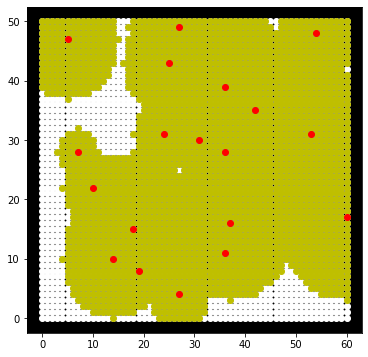

[[5, 18, 15],
 [1, 25, 43],
 [4, 60, 17],
 [4, 36, 39],
 [6, 14, 10],
 [6, 5, 47],
 [6, 27, 49],
 [3, 36, 11],
 [0, 24, 31],
 [5, 37, 16],
 [0, 31, 30],
 [2, 54, 48],
 [0, 10, 22],
 [3, 36, 28],
 [3, 19, 8],
 [3, 7, 28],
 [2, 42, 35],
 [5, 53, 31],
 [0, 27, 4],
 2698]

In [28]:
answer = population4[0]
ns = population4[10]
PlotResult(answer , Antennas ,s,m,n)
answer

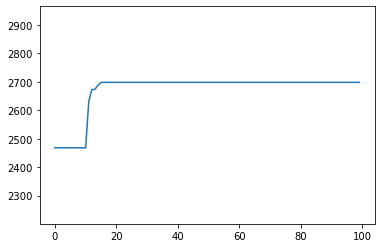

In [29]:
data=[]
fitness4 = np.array(fitness4)
for i in range(100):
    data.append(i)
plt.figure()    
plt.plot(data,fitness4)
plt.ylim(fitness4.min()-fitness4.mean()/10,fitness4.max()+fitness4.mean()/10)
plt.show()

In [ ]:
#implementing cross over with controll of position 
def XoverBox(parents , s ,antennas ,m,n):
    flag1 = True
    f2 = True
    while(f2):
        child1 = []
        child2 = []
        childs = []
        parent1 = parents[0]
        parent2 = parents[1]
        breakpoint = rand.randint(0,s)
        #parent1
        gene1=[]
        gene2=[]
        #parent2
        gene3=[]
        gene4=[]
        for i in range(0,breakpoint):
            gene1.append(parent1[i])
            gene3.append(parent2[i])

        for i in range(breakpoint,s+1):
            gene2.append(parent1[i])
            gene4.append(parent2[i])
        #print(breakpoint)    
        #print('parent 1 ',parent1)
        #print('parent 2 ',parent2)
        #print('gene 1 ',gene1)
        #print('gene 2 ',gene2)
        #print('gene 3 ',gene3)
        #print('gene 4 ',gene4)
        #adding gene1 and gene4 if they are valid
        t1 =[]
        t3 = []
        for i in range(len(gene1)):
            t1.append((gene1[i][1],gene1[i][2]))
            t3.append((gene3[i][1],gene3[i][2]))
        t2=[]
        t4=[]
        for i in range(len(gene2)-1):
            t2.append((gene2[i][1],gene2[i][2]))
            t4.append((gene4[i][1],gene4[i][2]))
        flag1 = True
        for i in range(len(t1)):
            if t1[i] in t4:
                flag1=False
        for i in range(len(t2)):
            if t2[i] in t3:
                flag1=False
        if flag1 ==True:
            child1 = gene1 + gene4
            child2 = gene3 + gene2
            f2 = False
            return child1, child2


